In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [134]:
train = pd.read_csv('C:\\Users\\Mgyu\\Desktop\\data\\train.csv')
test = pd.read_csv('C:\\Users\\Mgyu\\Desktop\\data\\test.csv')
submission = pd.read_csv('C:\\Users\\Mgyu\\Desktop\\data\\submission.csv')

In [29]:
import matplotlib.pyplot as plt

In [30]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [50]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [51]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [135]:
train.shape, test.shape, submission.shape

((1459, 11), (715, 10), (715, 2))

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [54]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [136]:
train[['hour','count']].groupby('hour').mean()

,count
hour,
0,71.766667
1,47.606557
2,31.409836
3,21.377049
4,13.524590
5,13.114754
6,24.557377
7,62.360656
8,136.688525


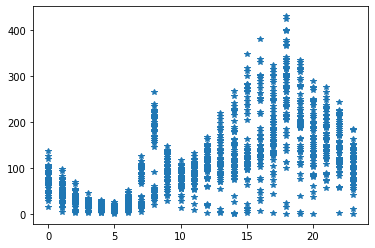

In [56]:
plt.plot('hour','count','*', data=train)

In [57]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

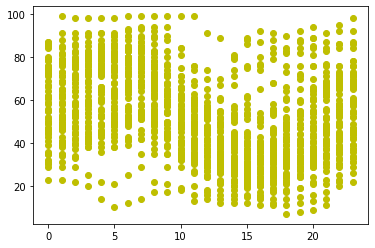

In [137]:
plt.plot('hour', 'hour_bef_humidity', 'yo', data = train)

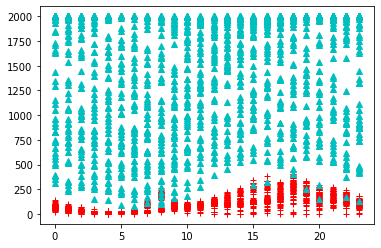

In [32]:
plt.plot('hour', 'count', 'r+', data = train)
plt.plot('hour', 'hour_bef_visibility', 'c^', data = train)

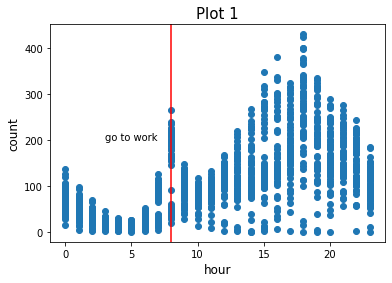

In [138]:
plt.title("Plot 1", fontsize = 15)
plt.plot('hour','count','o', data=train)
plt.xlabel('hour', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.axvline(8, color = 'red')
plt.text(3, 200, 'go to work', fontsize = 10)
plt.savefig('plot1.png')

In [60]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [61]:
import seaborn as sns

<AxesSubplot:>

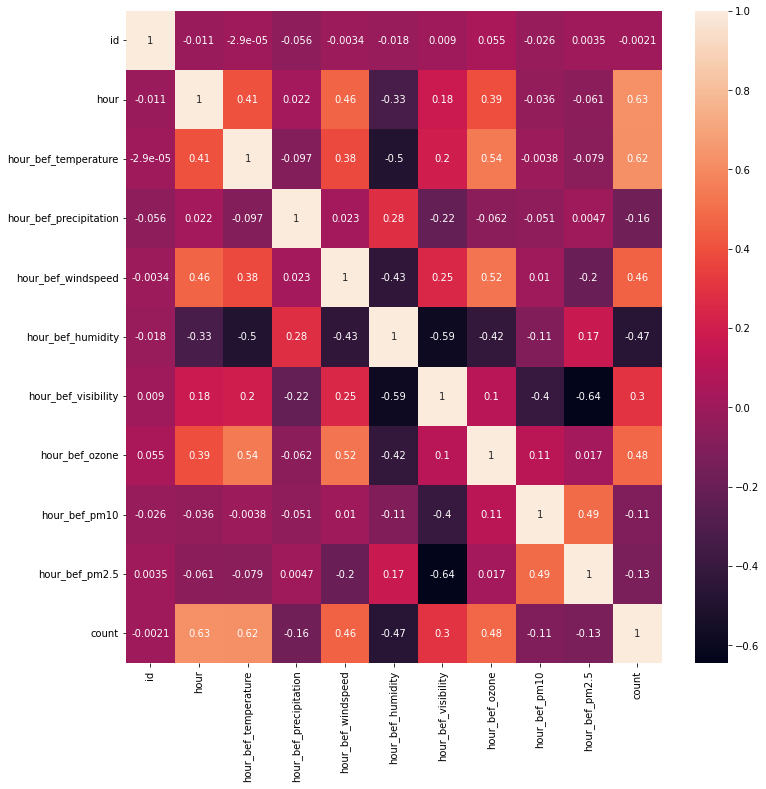

In [62]:
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), annot = True)

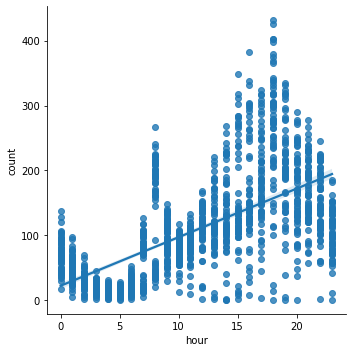

In [35]:
sns.lmplot(x = 'hour', y = 'count', data = train)

<AxesSubplot:ylabel='Frequency'>

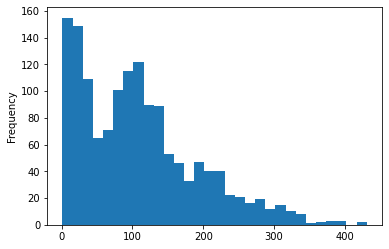

In [63]:
train['count'].plot(kind = 'hist', bins = 30)

<AxesSubplot:xlabel='count', ylabel='Density'>

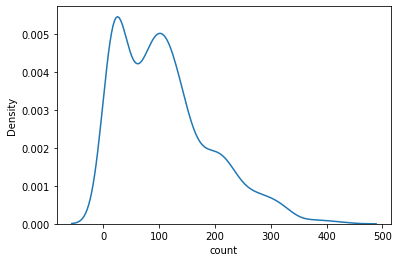

In [36]:
sns.kdeplot(train['count'])

<AxesSubplot:xlabel='hour', ylabel='hour_bef_humidity'>

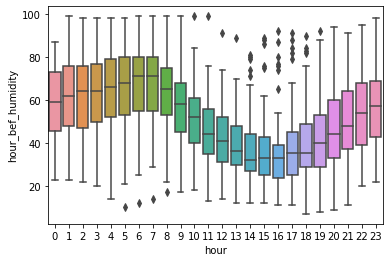

In [37]:
sns.boxplot(x = 'hour', y = 'hour_bef_humidity', data = train)

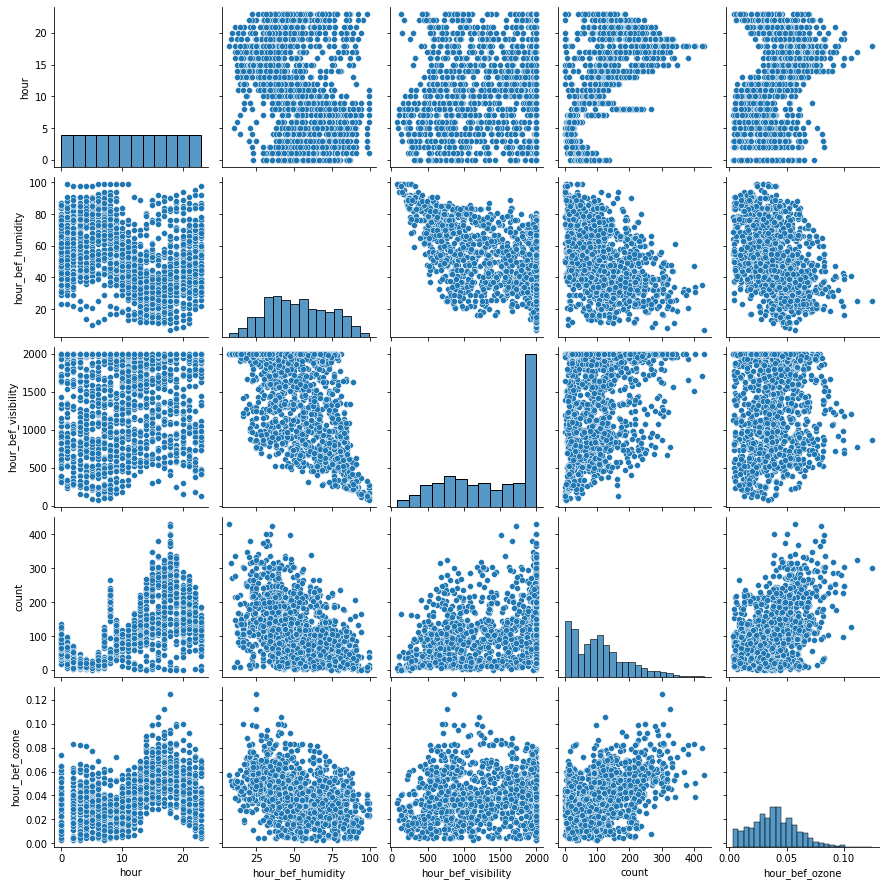

In [64]:
sns.pairplot(train[['hour', 'hour_bef_humidity', 'hour_bef_visibility', 'count', 'hour_bef_ozone']])

C:\anaconda3\envs\practice\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


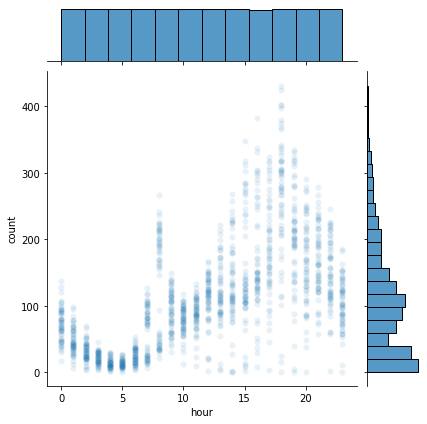

In [65]:
sns.jointplot('hour', 'count', data = train, alpha = 0.1)

<AxesSubplot:xlabel='hour', ylabel='hour_bef_humidity'>

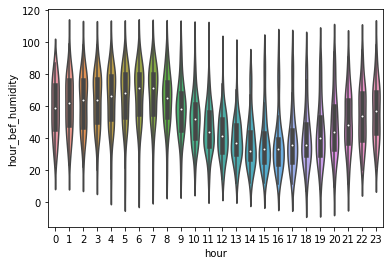

In [40]:
sns.violinplot(x = 'hour' , y = 'hour_bef_humidity', data = train)

In [139]:
train[train['hour'] > 12]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...
1448,2168,19,10.6,0.0,0.8,84.0,1091.0,0.033,23.0,22.0,114.0
1450,2170,15,23.1,0.0,4.3,23.0,1798.0,0.064,54.0,29.0,266.0
1453,2173,18,24.8,0.0,3.6,33.0,1262.0,0.084,113.0,49.0,303.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


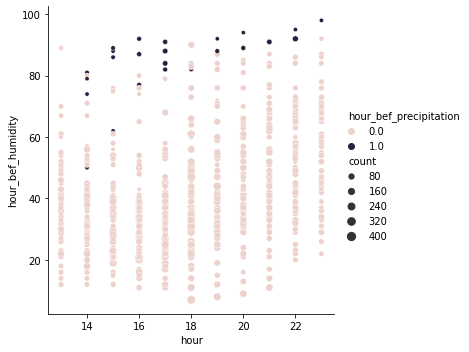

In [140]:
sns.relplot(x = 'hour', y = 'hour_bef_humidity', hue = 'hour_bef_precipitation', size = 'count', data = train[train['hour'] > 12])

In [141]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [142]:
train['hour_bef_temperature'] = train['hour_bef_temperature'].fillna(value = train['hour_bef_temperature'].mean())

In [143]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [144]:
train_isna_sum = train.isna().sum()

In [145]:
train_isna_sum[train_isna_sum != 0].index

Index(['hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

In [146]:
na_columns = train_isna_sum[train_isna_sum != 0].index

In [147]:
def fill_bicycle_na(df, column):
    df[column] = df[column].fillna(value = df[column].mean())

In [148]:
for col in na_columns:
    fill_bicycle_na(train, col)
    print(col, '결측값 대체 완료')

hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [149]:
test_isna_sum = test.isna().sum()

In [150]:
test_na_columns = test_isna_sum[test_isna_sum != 0].index

In [151]:
for col in test_na_columns:
    print(col)

hour_bef_temperature
hour_bef_precipitation
hour_bef_windspeed
hour_bef_humidity
hour_bef_visibility
hour_bef_ozone
hour_bef_pm10
hour_bef_pm2.5


In [152]:
for col in test_na_columns:
    fill_bicycle_na(test, col)
    print(col, '대체 완료')

hour_bef_temperature 대체 완료
hour_bef_precipitation 대체 완료
hour_bef_windspeed 대체 완료
hour_bef_humidity 대체 완료
hour_bef_visibility 대체 완료
hour_bef_ozone 대체 완료
hour_bef_pm10 대체 완료
hour_bef_pm2.5 대체 완료


In [153]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [154]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [155]:
model = KNeighborsRegressor(n_jobs = -1)

In [156]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [157]:
train['pm10'] = train['hour_bef_pm10'].apply(lambda x:  1 if x > 80 else 0)

In [158]:
test['pm10'] = test['hour_bef_pm10'].apply(lambda x:  1 if x > 80 else 0)

In [159]:
train['pm2.5'] = train['hour_bef_pm2.5'].apply(lambda x:  1 if x > 35 else 0)

In [160]:
test['pm2.5'] = test['hour_bef_pm2.5'].apply(lambda x:  1 if x > 35 else 0)

In [161]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,pm10,pm2.5
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0,0,0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0,0,1
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0,0,0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0,0,1
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0,0,0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0,0,0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0,0,0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0,0,1


In [162]:
column = ['hour', 'hour_bef_temperature', 'pm10', 'pm2.5']
X_train = train[column]
y_train = train['count']
X_test = test[column]

In [163]:
model_5 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 5)
model_7 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 7)
model_9 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 9)

In [165]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [166]:
# pm10, pm2.5 두 개 추가
np.mean(cross_val_score(model_9, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-1954.073300921785

In [129]:
# pm10만 추가
np.mean(cross_val_score(model_9, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-1968.1817454754885

In [91]:
# 추가 안함
np.mean(cross_val_score(model_9, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-1987.690754979273

In [89]:
np.mean(cross_val_score(model_5, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2154.0119004848657

In [90]:
np.mean(cross_val_score(model_7, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2053.407982413414

In [92]:
model_9.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=9)

In [93]:
submission['count'] = model_9.predict(X_test)

In [94]:
submission.to_csv('knn_9.csv', index = False)

In [95]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1)

In [96]:
submission['count'] = model.predict(X_test)

In [97]:
submission.to_csv('knn_5.csv', index = False)

In [98]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [99]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [100]:
X_train = train.drop(['id', 'count'], axis = 1)
y_train = train['count']
X_test = test.drop('id', axis = 1)

In [101]:
X_train.shape, y_train.shape, X_test.shape

((1459, 9), (1459,), (715, 9))

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
RandomForestRegressor()

RandomForestRegressor()

In [104]:
param = {'min_samples_split':[30, 50, 70],
        'max_depth': [5, 6, 7],
        'n_estimators': [50, 150, 250]}

In [105]:
gs = GridSearchCV(estimator=model, param_grid=param, scoring = 'neg_mean_squared_error', cv = 3)

In [106]:
gs

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [107]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [108]:
submission['count'] = gs.predict(X_test)

In [109]:
submission.to_csv('gridsearch.csv', index = False)

In [111]:
gs.best_params_

{'max_depth': 7, 'min_samples_split': 30, 'n_estimators': 150}

In [112]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.155677,0.008379,0.008002,0.000001,5,30,50,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2101.409947,-1780.862194,-1843.732547,-1908.668229,138.684769,15
1,0.533375,0.091971,0.024333,0.004715,5,30,150,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2119.968711,-1795.030860,-1774.944563,-1896.648044,158.124328,13
2,0.855395,0.044892,0.040670,0.015087,5,30,250,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2084.201010,-1779.767628,-1765.612048,-1876.526895,146.961443,8
3,0.164348,0.018875,0.010997,0.001413,5,50,50,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2168.418316,-1825.902978,-1810.401807,-1934.907701,165.238166,17
4,0.483155,0.016331,0.024669,0.002493,5,50,150,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2178.714788,-1817.100484,-1782.547216,-1926.120830,179.167079,16
5,0.858453,0.041478,0.036921,0.002454,5,50,250,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2159.159149,-1843.455949,-1804.757817,-1935.790972,158.733305,18
6,0.184016,0.008527,0.011665,0.001246,5,70,50,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2293.086330,-1910.943035,-1826.694967,-2010.241444,202.937357,26
7,0.562373,0.025174,0.026336,0.004495,5,70,150,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2268.439050,-1912.172174,-1823.210831,-2001.274019,192.373588,23
8,0.775902,0.018415,0.043671,0.016519,5,70,250,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2282.665039,-1891.015383,-1833.717280,-2002.465900,199.506785,24
9,0.171344,0.013426,0.010122,0.002052,6,30,50,"{'max_depth': 6, 'min_samples_split': 30, 'n_e...",-2035.561476,-1652.604200,-1809.731866,-1832.632514,157.178028,6


In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
param = {'min_samples_split': range(30, 70),
        'max_depth': [5, 6, 7],
        'n_estimators': range(50, 250)}

In [115]:
model = RandomForestRegressor()

In [116]:
rs = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter = 30, random_state=0, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [117]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'min_samples_split': range(30, 70),
                                        'n_estimators': range(50, 250)},
                   random_state=0, scoring='neg_mean_squared_error')

In [167]:
rs.best_params_

{'n_estimators': 171, 'min_samples_split': 34, 'max_depth': 7}

In [ ]:
submission['count'] = rs.predict(X_test)

In [ ]:
submission.to_csv('randomsearch.csv', index = False)

In [ ]:
pd.DataFrame(rs.cv_results_).sort_values('mean_test_score', ascending = False)

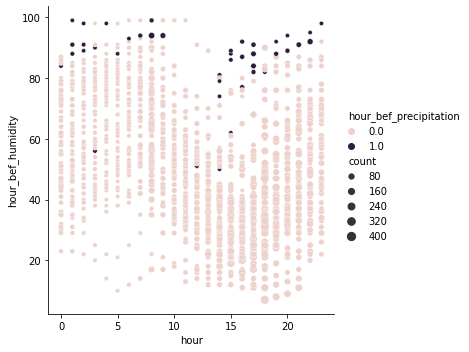

In [41]:
sns.relplot(x = 'hour', y = 'hour_bef_humidity', hue = 'hour_bef_precipitation', size = 'count', data = train)

In [43]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs = -1)

In [44]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train, test_size = 0.25, shuffle = True, random_state = 10)

In [47]:
X_trn.shape, X_val.shape, y_trn.shape, y_val.shape

((1094, 5), (365, 5), (1094,), (365,))

In [48]:
from sklearn.model_selection import KFold

In [49]:
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 10)

In [ ]:
scores = 0
for idx_trn, idx_val in kfolds.split(train_fts):

In [5]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [7]:
columns = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity']
X_train = train[columns]
y_train = train['count']
X_test = test[columns]

In [8]:
X_train.shape, y_train.shape, X_test.shape

((1459, 5), (1459,), (715, 5))

In [12]:
X_train['hour_bef_temperature'] = X_train['hour_bef_temperature'].fillna(value = X_train['hour_bef_temperature'].mean())
X_train['hour_bef_precipitation'] = X_train['hour_bef_precipitation'].fillna(value = X_train['hour_bef_precipitation'].mean())
X_train['hour_bef_windspeed'] = X_train['hour_bef_windspeed'].fillna(value = X_train['hour_bef_windspeed'].mean())
X_train['hour_bef_humidity'] = X_train['hour_bef_humidity'].fillna(value = X_train['hour_bef_humidity'].mean())


C:\Users\Mgyu\AppData\Local\Temp/ipykernel_7892/2408290669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['hour_bef_temperature'] = X_train['hour_bef_temperature'].fillna(value = X_train['hour_bef_temperature'].mean())
C:\Users\Mgyu\AppData\Local\Temp/ipykernel_7892/2408290669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['hour_bef_precipitation'] = X_train['hour_bef_precipitation'].fillna(value = X_train['hour_bef_precipitation'].mean())
C:\Users\Mgyu\AppData\Local\Temp/ipykernel

In [13]:
X_test['hour_bef_temperature'] = X_test['hour_bef_temperature'].fillna(value = X_test['hour_bef_temperature'].mean())
X_test['hour_bef_precipitation'] = X_test['hour_bef_precipitation'].fillna(value = X_test['hour_bef_precipitation'].mean())
X_test['hour_bef_windspeed'] = X_test['hour_bef_windspeed'].fillna(value = X_test['hour_bef_windspeed'].mean())
X_test['hour_bef_humidity'] = X_test['hour_bef_humidity'].fillna(value = X_test['hour_bef_humidity'].mean())

C:\Users\Mgyu\AppData\Local\Temp/ipykernel_7892/823361419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['hour_bef_temperature'] = X_test['hour_bef_temperature'].fillna(value = X_test['hour_bef_temperature'].mean())
C:\Users\Mgyu\AppData\Local\Temp/ipykernel_7892/823361419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['hour_bef_precipitation'] = X_test['hour_bef_precipitation'].fillna(value = X_test['hour_bef_precipitation'].mean())
C:\Users\Mgyu\AppData\Local\Temp/ipykernel_7892/82

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

In [21]:
model_dict = {'DT':DecisionTreeRegressor(), 
              'RF':RandomForestRegressor(),
             'LGB':lgb.LGBMRegressor(),
            'XGB':xgb.XGBRegressor(),
            'KNN':KNeighborsRegressor()}

In [25]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import cross_val_score

In [24]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [27]:
score = {}
for model_name in model_dict.keys():
    model = model_dict[model_name]
    score[model_name] = np.mean(cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', n_jobs = -1, cv = k_fold))
    print(f'{model_name} 평가 완료')

DT 평가 완료
RF 평가 완료
LGB 평가 완료
XGB 평가 완료
KNN 평가 완료


<AxesSubplot:>

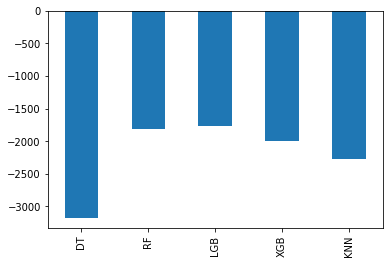

In [28]:
pd.Series(score).plot(kind = 'bar')